This notebook is the data analysis I did for [this post](https://lettertok.com/index.php/2020/08/26/rethinking-hydroxychloroquine/).

# [Boulware et al.](https://www.nejm.org/doi/10.1056/NEJMoa2016638)

> The incidence of new illness compatible with Covid-19 did not differ significantly between participants receiving hydroxychloroquine (49 of 414 [11.8%]) and those receiving placebo (58 of 407 [14.3%])

In [1]:
n( (49/414) / (58/407))

0.830543061802432

The study used [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) to calculate the p-value. In this case, p is the answer to the question, "Assume that there are $821$ patients, $107$ of whom are sick. We pick $414$ of them at random. We would expect $\frac{107}{821} \cdot 414 \approx 53.96 \approx 54$ to be sick.  What's the chance that 49 or less are sick, or 59 or more are sick?"

($49$ is the number we actually observed, and $59$ goes the same distance in the opposite direction, since it's a two-tailed test.)

For instance, the chance that the first 49 patients we choose are sick is 
$\frac{107}{821} \cdot \frac{106}{820} \cdots \frac{59}{773}$.
Of the $772$ patients not yet chosen, $58$  of them are sick. 
The chance that the next $414 - 49 = 365$ patients we choose are healthy is
$\frac{714}{772} \cdot \frac{713}{771} \cdots  \frac{350}{408} $.
But it was arbitrary to make the first $49$ patients sick, 
so we multiply by ${414 \choose 49}$.

Let's write a function that does just that.

In [2]:
def chance(sick_patients):
    prob = 1
    for i in range(sick_patients):
        prob = prob * (107-i)/(821-i)
    for i in range(414-sick_patients):
        prob = prob * (821-107 - i)/(821- sick_patients -i)
    prob = prob * binomial(414,sick_patients)
    return prob

Let's check that the chances sum to 1

In [3]:
sum = 0
for i in range(822): #0 to 821
    sum += chance(i)
print(n(sum))

1.00000000000000


In [4]:
sum = 0
for i in range(50): #0 to 49
    sum += chance(i)
for i in range(59,822): #59 to 821
    sum += chance(i)
print(n(sum))

0.350871118206300


And we get p=0.35, just as the paper says.

Now let's do the Bayesian analysis I describe in the blog.

In [5]:
ineffective_proportion = 58/407
effective_proportion = ineffective_proportion * 0.9
very_effective_proportion = ineffective_proportion * 0.5
dangerous_proportion = ineffective_proportion * 1.1
very_dangerous_proportion = ineffective_proportion * 1.5

In [6]:
print(n(very_effective_proportion))
print(n(effective_proportion))
print(n(ineffective_proportion))
print(n(dangerous_proportion))
print(n(very_dangerous_proportion))

0.0712530712530713
0.128255528255528
0.142506142506143
0.156756756756757
0.213759213759214


In [7]:
#Motorcycle versus stock market
print( 10000 * 0.97^50)
print( 10000 * 1.07^50)

2180.65375347407
294570.250630714


In [8]:
f(x) = x^49 * (1-x)^(414-49) * binomial(414,49, hold=True)

In [9]:
show(f)

x |--> -(x - 1)^365*x^49*binomial(414, 49)

In [10]:
latex(f)

x \ {\mapsto}\ -{\left(x - 1\right)}^{365} x^{49} {414 \choose 49}

In [11]:
print(n(f(very_effective_proportion)))
print(n(f(effective_proportion)))
print(n(f(ineffective_proportion)))
print(n(f(dangerous_proportion)))
print(n(f(very_dangerous_proportion)))
#The n() function makes the output a decimal instead of a huge fraction

0.000171386510778484
0.0503315749025967
0.0214397799798485
0.00504589206399895
1.61492837223403e-7


In [12]:
print(n(100*0.2*f(very_effective_proportion)))
print(n(100*0.2*f(effective_proportion)))
print(n(100*0.2*f(ineffective_proportion)))
print(n(100*0.2*f(dangerous_proportion)))
print(n(100*0.2*f(very_dangerous_proportion)))
#The n() function makes the output a decimal instead of a huge fraction

0.00342773021556968
1.00663149805193
0.428795599596971
0.100917841279979
3.22985674446806e-6


In [13]:
total = f(very_effective_proportion) + f(effective_proportion) + f(ineffective_proportion) + f(dangerous_proportion) + f(very_dangerous_proportion)

In [14]:
n(total * 0.2 * 100)

1.53977589900120

In [15]:
print(n(f(very_effective_proportion)/total))
print(n(f(effective_proportion)/total))
print(n(f(ineffective_proportion)/total))
print(n(f(dangerous_proportion)/total))
print(n(f(very_dangerous_proportion)/total))

0.00222612278695435
0.653751950985142
0.278479225369819
0.0655406032432649
2.09761481950923e-6


In [16]:
print(n(100*f(very_effective_proportion)/total))
print(n(100*f(effective_proportion)/total))
print(n(100*f(ineffective_proportion)/total))
print(n(100*f(dangerous_proportion)/total))
print(n(100*f(very_dangerous_proportion)/total))

0.222612278695435
65.3751950985142
27.8479225369819
6.55406032432649
0.000209761481950923


In [17]:
print(n(100*f(ineffective_proportion)/total) + n(100*f(dangerous_proportion)/total)+ n(100*f(very_dangerous_proportion)/total))

34.4021926227904


Digression: what if the data was different? That is, suppose the hydroxychloroquine results were the same as the control?

In [18]:
n(58/407 * 414)

58.9975429975430

In [19]:
n(59/414)

0.142512077294686

In [20]:
n(58/407)

0.142506142506143

Specifically, suppose 59 out of 414 of the hydroxychloroquine group got infected. That's 14.3%, 
almost exactly the same as the placebo group's 14.3%. Now follow the same procedure as before:

In [21]:
fake_f(x) = x^59 * (1-x)^(414-59) * binomial(414,59, hold=True)

In [22]:
show(fake_f)

x |--> -(x - 1)^355*x^59*binomial(414, 59)

In [23]:
print(n(fake_f(very_effective_proportion)))
print(n(fake_f(effective_proportion)))
print(n(fake_f(ineffective_proportion)))
print(n(fake_f(dangerous_proportion)))
print(n(fake_f(very_dangerous_proportion)))

1.96804363176439e-7
0.0388781457121887
0.0560069722228632
0.0404266781168745
0.0000579218083589014


In [24]:
total = fake_f(very_effective_proportion) + fake_f(effective_proportion) + fake_f(ineffective_proportion) + fake_f(dangerous_proportion) + fake_f(very_dangerous_proportion)

In [25]:
print(n(fake_f(very_effective_proportion)/total))
print(n(fake_f(effective_proportion)/total))
print(n(fake_f(ineffective_proportion)/total))
print(n(fake_f(dangerous_proportion)/total))
print(n(fake_f(very_dangerous_proportion)/total))

1.45382645519118e-6
0.287199307235300
0.413732788128065
0.298638572810091
0.000427878000088801


Another digression: What if our priors were different?

In [26]:
ineffective_proportion = 58/407
effective_proportion = ineffective_proportion * 0.9
very_effective_proportion = ineffective_proportion * 0.5
dangerous_proportion = ineffective_proportion * 1.1
very_dangerous_proportion = ineffective_proportion * 1.5

In [27]:
f(x) = x^49 * (1-x)^(414-49) * binomial(414,49, hold=True)

In [28]:
show(f)

x |--> -(x - 1)^365*x^49*binomial(414, 49)

In [29]:
prior_very_effective_proportion = 40
prior_effective_proportion = 40
prior_ineffective_proportion = 10
prior_dangerous_proportion = 5 
prior_very_dangerous_proportion = 5

In [30]:
posterior_very_effective_proportion = prior_very_effective_proportion * f(very_effective_proportion)
posterior_effective_proportion = prior_effective_proportion * f(effective_proportion)
posterior_ineffective_proportion = prior_ineffective_proportion * f(ineffective_proportion)
posterior_dangerous_proportion = prior_dangerous_proportion * f(dangerous_proportion)
posterior_very_dangerous_proportion = prior_very_dangerous_proportion * f(very_dangerous_proportion)

In [31]:
total = posterior_very_effective_proportion + posterior_effective_proportion + posterior_ineffective_proportion + posterior_dangerous_proportion + posterior_very_dangerous_proportion

In [32]:
print(n(posterior_very_effective_proportion/total))
print(n(posterior_effective_proportion/total))
print(n(posterior_ineffective_proportion/total))
print(n(posterior_dangerous_proportion/total))
print(n(posterior_very_dangerous_proportion/total))

0.00303372982676281
0.890924258370064
0.0948769242524658
0.0111647302255928
3.57325114785736e-7


In [33]:
print(n(100*posterior_very_effective_proportion/total))
print(n(100*posterior_effective_proportion/total))
print(n(100*posterior_ineffective_proportion/total))
print(n(100*posterior_dangerous_proportion/total))
print(n(100*posterior_very_dangerous_proportion/total))

0.303372982676281
89.0924258370064
9.48769242524658
1.11647302255928
0.0000357325114785736


End of digressions.

We can also integrate the likelihood function to get probabilties. (Well, we should multiply by the prior, but we assume the prior is uniform, i.e. $y = 1$.)

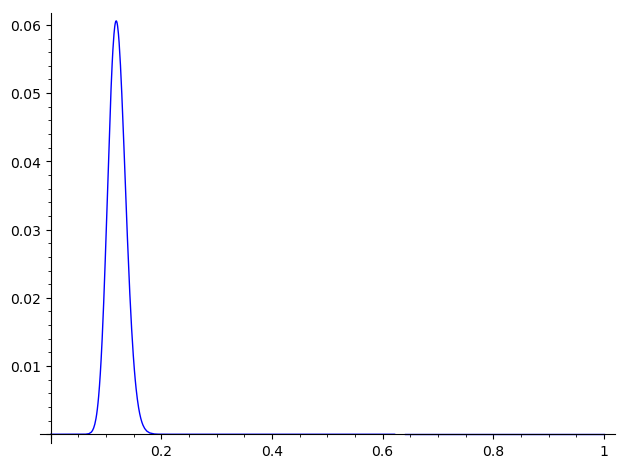

In [34]:
plot(f,0,1)

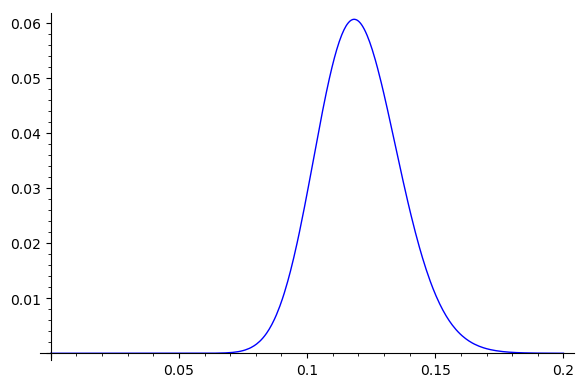

In [35]:
plot(f,0,0.2)

In [36]:
total_area = numerical_integral(f, 0, 1)[0]
print(total_area)
at_least_effective_area = numerical_integral(f, 0, effective_proportion)[0]
print(at_least_effective_area)
not_effective_area = numerical_integral(f, effective_proportion,1)[0]
print(not_effective_area)

#To check that the pieces add to the total
print( (at_least_effective_area + not_effective_area) / total_area ) 

print(at_least_effective_area / total_area)

0.0024096385542168746
0.0016948379490692445
0.0007148006051476249
0.9999999999999979
0.7033577488637344


So the probability of effectiveness is roughly 70%.

But really we should do this in 2 dimensions, since the control group's infection rate
is also determined by the data, so it may vary.

In [37]:
var('x y')
f_2d(x,y) = x^49 * (1-x)^(414-49) * binomial(414,49,hold=True) * y^58 * (1-y)^(407-58) * binomial(407,58,hold=True)
show(f_2d)

(x, y) |--> (x - 1)^365*x^49*(y - 1)^349*y^58*binomial(414, 49)*binomial(407, 58)

In [38]:
plot3d(f_2d*100, (0,1),(0,1))

Graphics3d Object

Now we need to do some integrals. Symbolic integration is theoretically possible, but the result is a really long expression. You don't believe me? Here it is:

In [39]:
var('x y')
f_2d.integrate(x,0,y)

y |--> 27101836261352403057669001965570401374968441258953491312131661547410800/83*(14589930354045020136586730464187821267314045147212760459986525400*y^415 - 5338187682074805374853804340731522286150712533029113262503523997500*y^414 + 973902579828020424659768642773459421832648639076701273857422581510000*y^413 - 118128236945984623013404413556597300211754734079077652326400433654852500*y^412 + 10716616649070517405542085070246440232835734829373453393289942990887665000*y^411 - 775626892116703286818382782418309553066376006033643245568693722683411582300*y^410 + 46651397423156236811081213808045024463161001829896390809266175007364119620000*y^409 - 2398414332997007495520961381179642502433611015296049355362521618524608210057500*y^408 + 107592749120047574577940326529675461448238009624754961007884323614305397295405000*y^407 - 4278357650354075681061891489993244354944590739044135489733055374065396803947742500*y^406 + 152685605271994242626657172443867547181795399273699547442977010258250911717380471600*y

Worse, the expression has lots of large (more than 100 digits) numbers, so SageMath encounters errors and thinks that the integral is sometimes negative, which is riduculous. 



*Where* are we integrating? The placebo proportion is represented by $y$, the hydroxychloroquine proportion by $x$. We want to know the chance that the hydroxychloroquine 
proportion is at least $10\%$ better than the placebo proportion. That is, we need $x \leq 0.9y$.


(Of course, we are assuming that our prior knowledge is uniform.)

In [40]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [41]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [42]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [43]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.6683714444990453


In [44]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.8470851993226352


So there's an 85% chance that hydroxychloroquine is better than the placebo, and a 67% chance that it reduces cases by at least 10%.

Before I figured out how to use SageMath's built-in numerical integration, I did it
using Monte Carlo integration, which was much slower and less accurate.



In [45]:
#This takes a long time---1 minute? 2 minutes?
import random
for j in range(10): #Do it ten times to make sure the results don't jump around
    total_volume = 0
    effective_volume = 0
    for i in range(100000):
        x = random.random()
        y = random.random()
        value = f_2d(x,y)
        total_volume += value
        if x <= 0.9*y:
            effective_volume += value
    print(effective_volume/total_volume)

0.6894516820972163
0.6249901715346099
0.6759584915783055
0.6472110465519125
0.6981347683159699
0.687890644602133
0.6761077587198506
0.6821597024531272
0.6786683281125644
0.639106862842741


When I analyze Horby et al. later on, I have to use my own integration method because
SageMath won't cooperate. Let's check that my method gives the right answers for this problem.

In [46]:
part_volume =  0
total_volume = 0
density = 100
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        value = f_2d(xx, yy)
        if 0.9 * yy >= xx:
            part_volume+= value
        total_volume += value

In [47]:
print(n(part_volume), n(total_volume), n(part_volume/total_volume))

0.0384530013381997 0.0590597684857099 0.651086218658371


In [48]:
part_volume =  0
total_volume = 0
density = 300
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        value = f_2d(xx, yy)
        if 0.9 * yy >= xx:
            part_volume+= value
        total_volume += value

In [49]:
print(n(part_volume), n(total_volume), n(part_volume/total_volume))

0.356537055127285 0.531537916371368 0.670765046379466


Let's look at the participants who took the drug completely: 
43/312 in the experimental group got infected, versus 50/336 in the control group.

(See the paper's supplemental appendix.)

In [50]:
n(43/312 / (50/336))

0.926153846153846

In [51]:
var('x y')
f_2d(x,y) = x^43 * (1-x)^(312-43) * binomial(312,43,hold=True) * y^50 * (1-y)^(336-50) * binomial(336,50,hold=True)
show(f_2d)

(x, y) |--> -(x - 1)^269*x^43*(y - 1)^286*y^50*binomial(336, 50)*binomial(312, 43)

In [52]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [53]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [54]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [55]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.43644423926443965


In [56]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.6527656841888028


What about the participants who took some of the drug? 
4/37 in the experimental group got infected, versus 3/15 in the control group.

In [57]:
n( 4/37/(3/15))

0.540540540540541

In [58]:
var('x y')
f_2d(x,y) = x^4 * (1-x)^(37-4) * binomial(37,4,hold=True) * y^3 * (1-y)^(15-3) * binomial(15,3,hold=True)
show(f_2d)

(x, y) |--> -(x - 1)^33*x^4*(y - 1)^12*y^3*binomial(37, 4)*binomial(15, 3)

In [59]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [60]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [61]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [62]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.7860010827253943


In [63]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.8296253815322459


What about the participants who took none of the drug? 
2/65 in the experimental group got infected, versus 5/56 in the control group.

In [64]:
n( 2/65/(5/56))

0.344615384615385

In [65]:
var('x y')
f_2d(x,y) = x^2 * (1-x)^(65-2) * binomial(65,2,hold=True) * y^5 * (1-y)^(56-5) * binomial(56,5,hold=True)
show(f_2d)

(x, y) |--> (x - 1)^63*x^2*(y - 1)^51*y^5*binomial(65, 2)*binomial(56, 5)

In [66]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [67]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [68]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [69]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.8764540990473931


In [70]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.9058717565052852


Let's compare the percentage sick in the various subgroups of this study.

In [71]:
print(n(43/312))
print(n(50/336))

0.137820512820513
0.148809523809524


In [72]:
print(n(4/37))
print(n(3/15))

0.108108108108108
0.200000000000000


In [73]:
print(n(2/65))
print(n(5/56))

0.0307692307692308
0.0892857142857143


# [Skipper et al.](https://www.acpjournals.org/doi/full/10.7326/M20-4207)

> At 14 days, 24% (49 of 201) of participants receiving hydroxychloroquine had ongoing symptoms compared with 30% (59 of 194) receiving placebo (P = 0.21).

Same procedure as last time.

In [74]:
n( (49/201) / (59/194))

0.801585293869635

In [75]:
ineffective_proportion = 59/194
effective_proportion = ineffective_proportion * 0.9
very_effective_proportion = ineffective_proportion * 0.5
dangerous_proportion = ineffective_proportion * 1.1
very_dangerous_proportion = ineffective_proportion * 1.5

In [76]:
f(x) = x^49 * (1-x)^(201-49) * binomial(201,49, hold=True)

In [77]:
show(f)

x |--> (x - 1)^152*x^49*binomial(201, 49)

In [78]:
print(n(f(very_effective_proportion)))
print(n(f(effective_proportion)))
print(n(f(ineffective_proportion)))
print(n(f(dangerous_proportion)))
print(n(f(very_dangerous_proportion)))
#The n() function makes the output a decimal instead of a huge fraction

0.000213115038855560
0.0411358667778100
0.0107795231338404
0.00129091347725268
2.42500308651183e-10


In [79]:
total = f(very_effective_proportion) + f(effective_proportion) + f(ineffective_proportion) + f(dangerous_proportion) + f(very_dangerous_proportion)

In [80]:
print(n(f(very_effective_proportion)/total))
print(n(f(effective_proportion)/total))
print(n(f(ineffective_proportion)/total))
print(n(f(dangerous_proportion)/total))
print(n(f(very_dangerous_proportion)/total))

0.00398946757865432
0.770054556971662
0.201790348943686
0.0241656219664439
4.53955349360988e-9


So hydroxychloroquine is probably effective.

In [81]:
var('x y')
f_2d(x,y) = x^49 * (1-x)^(201-49) * binomial(201,49, hold=True) * y^59 * (1-y)^(194-59) * binomial(194,59,hold=True)
show(f_2d)

(x, y) |--> -(x - 1)^152*x^49*(y - 1)^135*y^59*binomial(201, 49)*binomial(194, 59)

In [82]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [83]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [84]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [85]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.7559254454549569


In [86]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.9100585108660569


So there's a 91% chance that hydroxychloroquine is better than the placebo, and a 76% chance that it reduces cases by at least 10%.

**The following is speculative. I might be comparing apples to oranges, and I'm not sure that
a uniform prior is a reasonable choice.**

Since Skipper et al. and Boulware et al. are kind of measuring the same thing, we can try to combine their statistics. That is, assume that the chance of developing symptoms in Boulware et al. is some fraction $z$ of the chance in Skipper. Then we can "import" Boulware's data into Skipper.


In [87]:
var('x y k')
f_3d(x,y,k) = x^49 * (1-x)^(201-49) * binomial(201,49, hold=True) * y^59 * (1-y)^(194-59) * binomial(194,59,hold=True)  * (k*x)^49 * (1-k*x)^(414-49) * binomial(414,49,hold=True) * (k*y)^58 * (1-k*y)^(407-58) * binomial(407,58,hold=True)
show(f_3d)

(x, y, k) |--> -(k*x - 1)^365*(k*y - 1)^349*k^107*(x - 1)^152*x^98*(y - 1)^135*y^117*binomial(414, 49)*binomial(407, 58)*binomial(201, 49)*binomial(194, 59)

In [88]:
from scipy.integrate import tplquad

In [89]:
#The ordering of the variables is weird
gfun = lambda k: 0
hfun = lambda k: 1
qfun = lambda k,y: 0
rfun = lambda k,y: 0.9*y 
effective_volume = tplquad( f_3d, 0, 1, gfun, hfun, qfun, rfun )[0]
print(effective_volume)

5.411877197980955e-09


In [90]:
gfun = lambda k: 0
hfun = lambda k: 1
qfun = lambda k,y: 0
rfun = lambda k,y: y 
safe_volume = tplquad( f_3d, 0, 1, gfun, hfun, qfun, rfun )[0]
print(safe_volume)

6.528422087537368e-09


In [91]:
gfun = lambda k: 0
hfun = lambda k: 1
qfun = lambda k,y: 0
rfun = lambda k,y: 1
total_volume= tplquad( f_3d, 0, 1, gfun, hfun, qfun, rfun )[0]
print(total_volume)

6.843994100902817e-09


In [92]:
print(safe_volume/total_volume)
print(effective_volume/total_volume)

0.9538906654925636
0.7907483726888447


So it looks like a 95% chance that hydroxychloroquine does not make patients more sick,
and a 79% chance that it reduces cases by at least 10%. **I don't trust these numbers.**
Even if it was valid to compare the studies, I'm not sure that this statistical method is
the right one. 
It gives probabilites that are lower than I expected.

Let's do the integrals a slower way.

In [93]:
effective_volume =  0
safe_volume =  0
total_volume = 0
density = 30
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        for k in range(density):
            kk = k / density
            value = f_3d(xx, yy,kk)
            if  yy >= xx:
                safe_volume+= value
            if  0.9 * yy >= xx:
                effective_volume+= value
            total_volume += value
effective_volume = effective_volume / density ^ 3
safe_volume = safe_volume / density ^ 3
total_volume = total_volume / density ^ 3

print(n(effective_volume))
print(n(safe_volume))
print(n(total_volume))

print(n(safe_volume/total_volume))
print(n(effective_volume/total_volume))

6.09161669138185e-9
6.76651578836300e-9
6.84282719741760e-9
0.988847970750541
0.890219278616410


In [94]:
effective_volume =  0
safe_volume =  0
total_volume = 0
density = 40
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        for k in range(density):
            kk = k / density
            value = f_3d(xx, yy,kk)
            if  yy >= xx:
                safe_volume+= value
            if  0.9 * yy >= xx:
                effective_volume+= value
            total_volume += value
effective_volume = effective_volume / density ^ 3
safe_volume = safe_volume / density ^ 3
total_volume = total_volume / density ^ 3

print(n(effective_volume))
print(n(safe_volume))
print(n(total_volume))

print(n(safe_volume/total_volume))
print(n(effective_volume/total_volume))

5.06957969207133e-9
6.72430911409873e-9
6.84272611467702e-9
0.982694470216440
0.740871343834375


In [95]:
effective_volume =  0
safe_volume =  0
total_volume = 0
density = 50
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        for k in range(density):
            kk = k / density
            value = f_3d(xx, yy,kk)
            if  yy >= xx:
                safe_volume+= value
            if  0.9 * yy >= xx:
                effective_volume+= value
            total_volume += value
effective_volume = effective_volume / density ^ 3
safe_volume = safe_volume / density ^ 3
total_volume = total_volume / density ^ 3

print(n(effective_volume))
print(n(safe_volume))
print(n(total_volume))

print(n(safe_volume/total_volume))
print(n(effective_volume/total_volume))

5.36078489855872e-9
6.69338517816548e-9
6.84272621368508e-9
0.978175213963562
0.783428231840906


What is the constant $k$?

In [96]:
from scipy.integrate import dblquad

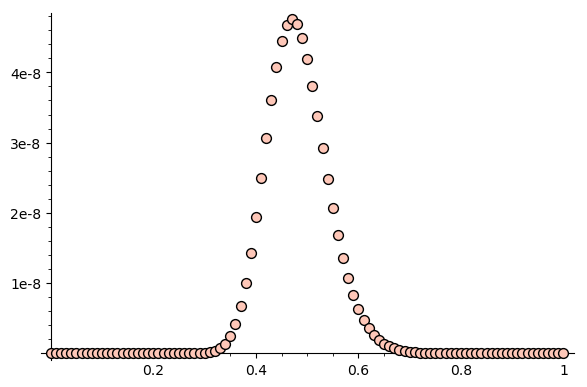

In [97]:
density = 100
points = [ (i/density, dblquad( f_3d, 0, 1, gfun, hfun, args = [i/density] )[0] ) for i in range(density+1)]
scatter_plot(points)


The constant $k$ is somewhere around 0.5, which makes sense because all the proportions 
from Boulware are half of their counterparts in Skipper, as you can see:

In [98]:
n(49/414 / (49/201))

0.485507246376812

In [99]:
n( 58/407 / (59/194))

0.468579519426977

Skipper et al. also looks at hospitalization/death rates:
> The incidence of hospitalization or death was 3.2% (15 of 465) among participants with known vital status. With hydroxychloroquine, 4 hospitalizations and 1 nonhospitalized death occurred (n = 5 events). With placebo, 10 hospitalizations and 1 hospitalized death occurred (n = 10 events); of these hospitalizations, 2 were not COVID-19–related (nonstudy medicine overdose and syncope). The incidence of hospitalization or death did not differ between groups (P = 0.29).

Based on the flow chart (Figure 1), the placebo group had 234 patients, and the hydroxychloroquine group had 231 patients. This does add up to 465. I'm going to decrease
the placebo group's hospitalizations by 2 because those 2 patients were not hospitalized for
COVID-19.

In [100]:
n(8/234)

0.0341880341880342

In [101]:
n(5/235)

0.0212765957446809

In [102]:
n(5/235 / (8/234))

0.622340425531915

In [103]:
n(5/235 / (8/234)) ^ -1

1.60683760683761

In [104]:
var('x y')
f_2d(x,y) = x^5 * (1-x)^(235-5) * binomial(235,5, hold=True) * y^8 * (1-y)^(234-8) * binomial(234,8,hold=True)
show(f_2d)

(x, y) |--> (x - 1)^230*x^5*(y - 1)^226*y^8*binomial(235, 5)*binomial(234, 8)

In [105]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [106]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [107]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [108]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.7314235205271544


In [109]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.7939248539228614


So there's a 73% chance that hydroxychloroquine decreases hospitalizations/deaths by at least 10%, and a 79% chance
that it decreases hospitalizations. I'm surprised that we can get such high probabilities from
just a few hospitalizations, but the placebo group did have 60% more of them.

# [Mitjà et al.](https://academic.oup.com/cid/advance-article/doi/10.1093/cid/ciaa1009/5872589)

> The clinical outcome of risk of hospitalization was similar in the control arm (7.1%, 11/157) and the intervention arm (5.9%, 8/136;RR 0.75 [95% CI 0.32; 1.77]) (Table 2).

Here we go again.


In [110]:
n( (8/136) / (11/157))

0.839572192513369

In [111]:
ineffective_proportion = 11/157
effective_proportion = ineffective_proportion * 0.9
very_effective_proportion = ineffective_proportion * 0.5
dangerous_proportion = ineffective_proportion * 1.1
very_dangerous_proportion = ineffective_proportion * 1.5

In [112]:
f(x) = x^8 * (1-x)^(136-8) * binomial(136,8, hold=True)

In [113]:
show(f)

x |--> (x - 1)^128*x^8*binomial(136, 8)

In [114]:
print(n(f(very_effective_proportion)))
print(n(f(effective_proportion)))
print(n(f(ineffective_proportion)))
print(n(f(dangerous_proportion)))
print(n(f(very_dangerous_proportion)))
#The n() function makes the output a decimal instead of a huge fraction

0.0555971684750819
0.140876262292071
0.125210622945351
0.101946062708870
0.0235383063646503


In [115]:
total = f(very_effective_proportion) + f(effective_proportion) + f(ineffective_proportion) + f(dangerous_proportion) + f(very_dangerous_proportion)

In [116]:
print(n(f(very_effective_proportion)/total))
print(n(f(effective_proportion)/total))
print(n(f(ineffective_proportion)/total))
print(n(f(dangerous_proportion)/total))
print(n(f(very_dangerous_proportion)/total))

0.124331606710266
0.315040720930965
0.280007747786041
0.227981354483190
0.0526385700895380


*This* is what inconclusive data looks like. The results lean toward hydroxychloroquine reducing hospitalizations, but there's still a 56% chance that it's ineffective or harmful.

In [117]:
var('x y')
f_2d(x,y) = x^8 * (1-x)^(136-8) * binomial(136,8, hold=True) * y^11 * (1-y)^(157-11) * binomial(157,11,hold=True)
show(f_2d)

(x, y) |--> (x - 1)^128*x^8*(y - 1)^146*y^11*binomial(157, 11)*binomial(136, 8)

In [118]:
def inner1(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=0.9y'''
    return numerical_integral(f_2d, 0, 0.9*y, params = [y])[0]

In [119]:
def inner2(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=1'''
    return numerical_integral(f_2d, 0, 1, params = [y])[0]

In [120]:
def inner3(y):
    '''For constant y, this function does the integral with
    respect to x, from x=0 to x=y'''
    return numerical_integral(f_2d, 0, y, params = [y])[0]

In [121]:
part_volume =  numerical_integral(inner1, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.5456222630855441


In [122]:
part_volume =  numerical_integral(inner3, 0, 1)[0]
total_volume = numerical_integral(inner2, 0, 1)[0]
print(part_volume/total_volume)

0.6407564605821422


So there's a 64% chance that hydroxychloroquine is better than the placebo, and only a 54% chance that it reduces cases by at least 10%. The prior probabilities were 50% and 45%, so we're not updating by very much.

Let's bring in the hospitalization data from Skipper et al. and use my **highly speculative** method.


In [123]:
var('x y k')
f_3d(x,y,k) = x^8 * (1-x)^(136-8) * binomial(136,8, hold=True) * y^11 * (1-y)^(157-11) * binomial(157,11,hold=True) * (k*x)^5 * (1-(k*x))^(235-5) * binomial(235,5, hold=True) * (k*y)^8 * (1-(k*y))^(234-8) * binomial(234,8,hold=True)
show(f_3d)

(x, y, k) |--> (k*x - 1)^230*(k*y - 1)^226*k^13*(x - 1)^128*x^13*(y - 1)^146*y^19*binomial(235, 5)*binomial(234, 8)*binomial(157, 11)*binomial(136, 8)

In [124]:
from scipy.integrate import tplquad

In [125]:
#The ordering of the variables is weird
gfun = lambda k: 0
hfun = lambda k: 1
qfun = lambda k,y: 0
rfun = lambda k,y: 0.9*y 
effective_volume = tplquad( f_3d, 0, 1, gfun, hfun, qfun, rfun )[0]
print(effective_volume)

1.624275021015414e-07


In [126]:
gfun = lambda k: 0
hfun = lambda k: 1
qfun = lambda k,y: 0
rfun = lambda k,y: y 
safe_volume = tplquad( f_3d, 0, 1, gfun, hfun, qfun, rfun )[0]
print(safe_volume)

1.8566276539272728e-07


In [127]:
gfun = lambda k: 0
hfun = lambda k: 1
qfun = lambda k,y: 0
rfun = lambda k,y: 1
total_volume= tplquad( f_3d, 0, 1, gfun, hfun, qfun, rfun )[0]
print(total_volume)

2.3381682205960883e-07


In [128]:
print(safe_volume/total_volume)
print(effective_volume/total_volume)

0.7940522147093196
0.6946784267734699


So we have a 79% chance that hydroxychloroquine is safer than the placebo, and a 69% chance
that it reduces cases by at least 10%. If possible, I trust these numbers **even less** than
when I combined two studies up above. The two following expressions show that it is **not** the case that the results of Mitjà et al. are just a multiple of Skipper et al. That breaks  the critical assumptions of my methods. It is **much better** to do the statistics separately for each study and then make an intuitive judgement about what they mean together.

(I'm sorry I'm using so much bold, but I want to be very clear about which sections of this notebook are unreliable.)

In [129]:
n(  (5/235) /(8/136)  )

0.361702127659574

In [130]:
n( 8/234 / (11/157))

0.487956487956488

And thus the constant $k$ has a wide distribution, indicating that there really isn't a 
value of $k$ that works:

In [131]:
from scipy.integrate import dblquad

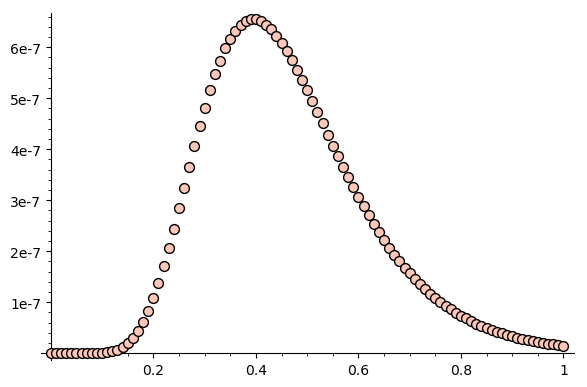

In [132]:
density = 100
points = [ (i/density, dblquad( f_3d, 0, 1, gfun, hfun, args = [i/density] )[0] ) for i in range(density+1)]
scatter_plot(points)


# [Horby et al](https://www.medrxiv.org/content/10.1101/2020.07.15.20151852v1)

Let's do the big British randomized control trial. This one studied whether hydroxychloroquine prevented deaths, and the answer was no.

> Results: 1561 patients randomly allocated to receive hydroxychloroquine were compared with 3155 patients concurrently allocated to usual care. Overall, 418 (26.8%) patients allocated hydroxychloroquine and 788 (25.0%) patients allocated usual care died within 28 days (rate ratio 1.09; 95% confidence interval [CI] 0.96 to 1.23; P=0.18).
    
    

In [133]:
n((418/1561) / (788/3155))

1.07212771976834

In [134]:
ineffective_proportion = 788/3155
effective_proportion = ineffective_proportion * 0.9
very_effective_proportion = ineffective_proportion * 0.5
dangerous_proportion = ineffective_proportion * 1.1
very_dangerous_proportion = ineffective_proportion * 1.5

In [135]:
f(x) = x^418 * (1-x)^(1561-418) * binomial(1561,418,hold=True) 

In [136]:
show(f)

x |--> -(x - 1)^1143*x^418*binomial(1561, 418)

In [137]:
print(n(f(very_effective_proportion)))
print(n(f(effective_proportion)))
print(n(f(ineffective_proportion)))
print(n(f(dangerous_proportion)))
print(n(f(very_dangerous_proportion)))
#The n() function makes the output a decimal instead of a huge fraction

2.39677198943557e-52
8.12393127425579e-6
0.00602380538451211
0.0188375797027912
1.01781031504652e-19


In [138]:
total = f(very_effective_proportion) + f(effective_proportion) + f(ineffective_proportion) + f(dangerous_proportion) + f(very_dangerous_proportion)

In [139]:
print(n(f(very_effective_proportion)/total))
print(n(f(effective_proportion)/total))
print(n(f(ineffective_proportion)/total))
print(n(f(dangerous_proportion)/total))
print(n(f(very_dangerous_proportion)/total))

9.63739166561420e-51
0.000326662310389288
0.242216498122754
0.757456839566857
4.09260317236747e-18


So hydroxychloroquine is probably dangerous.

In [140]:
var('x y')
f_2d(x,y) = x^418 * (1-x)^(1561-418) * y^788 * (1-y)^(3155-788)  
show(f_2d)
#The binomials are just constants, so I could leave them out.

(x, y) |--> (x - 1)^1143*x^418*(y - 1)^2367*y^788

In [141]:
dangerous_volume =  0
unsafe_volume =  0
safe_volume =  0
effective_volume =  0
total_volume = 0
density = 100
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        value = f_2d(xx, yy)
        if 1.1 * yy <= xx: #Raises death rates by at least 10%
            dangerous_volume+= value
        if  yy < xx: #Raises death rates
            unsafe_volume+= value
        if xx <= yy: #Does not raise death rates
            safe_volume+= value
        if  0.9 * yy >= xx: #Lowers death rates by at least 10% 
            effective_volume+= value
        total_volume += value

In [142]:
print(n(dangerous_volume/total_volume))
print(n(unsafe_volume/total_volume))
print(n(safe_volume/total_volume))
print(n(effective_volume/total_volume))

0.301958885090088
0.839044451427119
0.160955548572881
0.000510455405632987


In [143]:
dangerous_volume =  0
unsafe_volume =  0
safe_volume =  0
effective_volume =  0
total_volume = 0
density = 300
for x in range(density):
    xx = x / density
    for y in range(density):
        yy = y / density
        value = f_2d(xx, yy)
        if 1.1 * yy <= xx: #Raises death rates by at least 10%
            dangerous_volume+= value
        if  yy < xx: #Raises death rates
            unsafe_volume+= value
        if xx <= yy: #Does not raise death rates
            safe_volume+= value
        if  0.9 * yy >= xx: #Lowers death rates by at least 10% 
            effective_volume+= value
        total_volume += value

In [144]:
print(n(dangerous_volume/total_volume))
print(n(unsafe_volume/total_volume))
print(n(safe_volume/total_volume))
print(n(effective_volume/total_volume))

0.306166791525411
0.888306834715452
0.111693165284547
0.000524937366943429


Ah, now the result is more subtle. Assume we start with a uniform prior. 
The data tells us that there's an $89\%$ chance that hydroxychloroquine increases the death
rate, but there's only a $31\%$ chance that it raises the death rate by at least $10\%$. 

Of course, the chance that hydroxychloroquine *lowers* the death rate by at least $10\%$ 
is miniscule: $0.05\%$.